# Soccer Analytics Tutorial
Welcome to the Soccer Analytics tutorial! This notebook will guide you through the process of working with soccer data, from loading and exploring the data to querying the database and visualizing insights.

## Objectives
- Understand the structure of the data.
- Learn how to load and process tracking and event data.
- Query the database using SQL.
- Visualize key insights using Python libraries.

## Prerequisites
- Python 3.
- Libraries: pandas, matplotlib, psycopg2, sqlalchemy.
- Read-only access to the PostgreSQL database.

## Step 1: Load Tracking Data
We will fetch tracking data directly from the database.

In [ ]:
%pip install sqlalchemy matplotsoccer mplsoccer dotenv pandas -q

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import psycopg2
import dotenv
import os

dotenv.load_dotenv()

PG_PASSWORD = os.getenv("PG_PASSWORD")
PG_USER = os.getenv("PG_USER")
PG_HOST = os.getenv("PG_HOST")
PG_PORT = os.getenv("PG_PORT")
PG_DB = os.getenv("PG_DB")

# Database connection parameters
import psycopg2
import os

conn = psycopg2.connect(
    host=PG_HOST,
    database=PG_DB,
    user=PG_USER,
    password=PG_PASSWORD,
    port=PG_PORT,
    sslmode="require",
)

# Query to fetch tracking data
query = """
SELECT pt.frame_id, pt.timestamp, pt.player_id, pt.x, pt.y, p.jersey_number, p.player_name, p.team_id
FROM player_tracking pt
JOIN players p ON pt.player_id = p.player_id
JOIN teams t ON p.team_id = t.team_id
WHERE pt.game_id = '5uts2s7fl98clqz8uymaazehg';
"""
tracking_df = pd.read_sql_query(query, conn)
tracking_df.head()

C:\Users\riman\AppData\Local\Temp\ipykernel_25784\2586338550.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tracking_df = pd.read_sql_query(query, conn)


,frame_id,timestamp,player_id,x,y,jersey_number,player_name,team_id
0,1722799204000,00:05:04,pi2sxs616a52jvpfywgwjowl,46.591803,82.008591,22,G. Ruyssen,4dtif7outbuivua8umbwegoo5
1,1722799204000,00:05:04,60gs7lod7de72ypcs6qfup8q2,53.204590,50.845902,9,A. Guðjohnsen,8y3iucyxguipljcmf87a11bk9
2,1722799204000,00:05:04,3r04y1fejoh9e8qbge3exy3u1,21.321672,2.013952,22,N. Fadiga,8y3iucyxguipljcmf87a11bk9
3,1722799204000,00:05:04,dxcsuw39xzusjsj5e1jw53y6t,77.095147,49.095082,34,M. Verrips,4dtif7outbuivua8umbwegoo5
4,1722799204000,00:05:04,863wevd1kdzq5sd7qpmhr4lqs,30.326181,13.390267,88,F. Ferraro,4dtif7outbuivua8umbwegoo5


## Step 3: Query the Database
We will use SQL to query the database for event data.

In [10]:
# Merged query to fetch event data with event type names
query = """
SELECT 
    me.event_id, 
    me.eventtype_id, 
    p.player_name,
    et.name AS event_name, 
    me.player_id, 
    me.x, 
    me.y, 
    me.period_id, 
    me.timestamp
FROM matchevents me
JOIN eventtypes et ON me.eventtype_id = et.eventtype_id
JOIN players p ON me.player_id = p.player_id
WHERE me.match_id = '5uts2s7fl98clqz8uymaazehg';
"""
events_df = pd.read_sql_query(query, conn)
events_df.head()

,event_id,eventtype_id,player_name,event_name,player_id,x,y,period_id,timestamp
0,2706117599,e319ac55-ffaf-4e6d-87f7-7601d91bcd33,A. Guðjohnsen,PASS,60gs7lod7de72ypcs6qfup8q2,50.0,50.0,1,0 days 00:00:00.011000
1,2706117617,e319ac55-ffaf-4e6d-87f7-7601d91bcd33,S. Kums,PASS,18pgjfpl9s8qy32mblzygsyc5,46.4,51.0,1,0 days 00:00:01.925000
2,2706117631,e319ac55-ffaf-4e6d-87f7-7601d91bcd33,Hong Hyun-Seok,PASS,8fs5klbsyx06c5ds9s1i3xu96,44.0,70.6,1,0 days 00:00:04.097000
3,2706117709,e319ac55-ffaf-4e6d-87f7-7601d91bcd33,A. Brown,PASS,8kz0e83d3azssd7unbk2lqt0q,40.9,94.0,1,0 days 00:00:06.229000
4,2706117769,e319ac55-ffaf-4e6d-87f7-7601d91bcd33,S. Mitrović,PASS,32sds4yk7ch30mng0gyzhdk9h,37.5,50.8,1,0 days 00:00:16.105000


## Step 4: Visualize Insights
We will create visualizations to analyze the data.

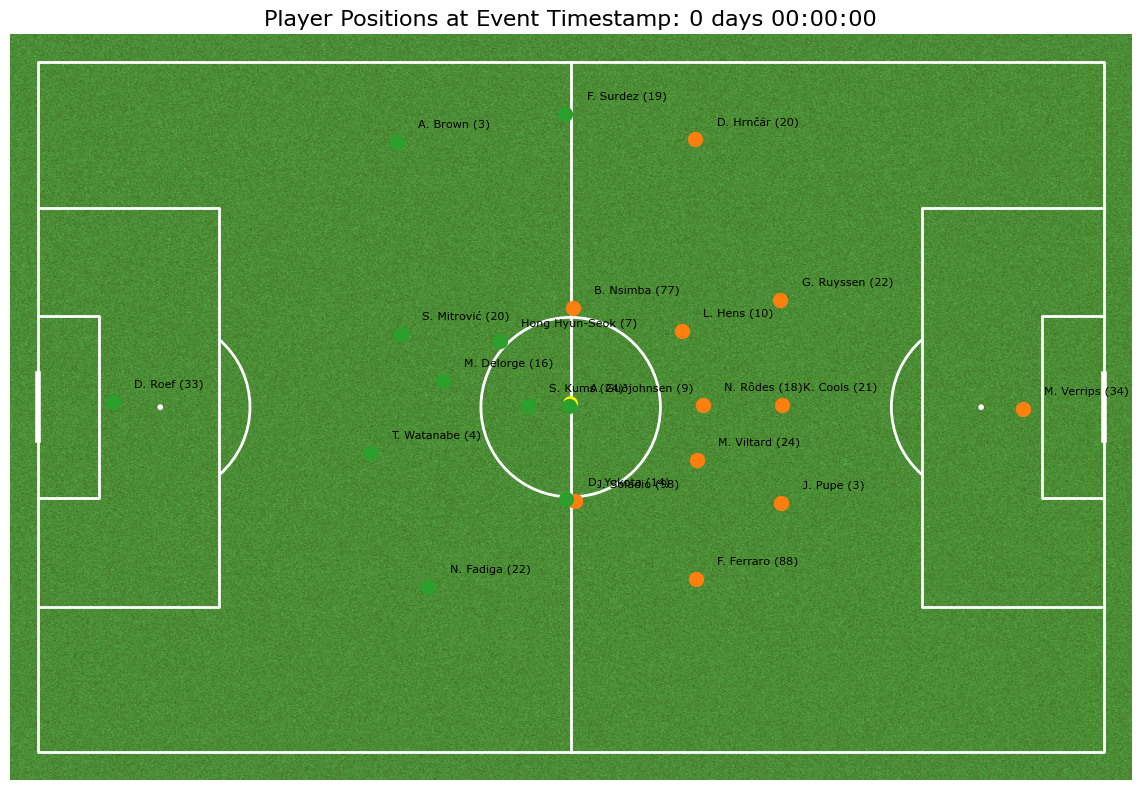

In [11]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import matplotlib as mpl

def plot_tracking_data(tracking_data):
    # Define pitch dimensions and colors
    pitch = Pitch(pitch_color='grass', line_color='white', pitch_type='opta',
                  pitch_length=105, pitch_width=68)  # Adjust dimensions if necessary
    fig, ax = pitch.draw(figsize=(12, 8))
    
    # Extract timestamp and team names
    timestamp = tracking_data['timestamp'].iloc[0]
    team_names = tracking_data['team_id'].unique()
    colors = mpl.colors.TABLEAU_COLORS
    color_map = {team: color for team, color in zip(team_names, colors.values())}
    
    # Plot player positions
    for _, row in tracking_data.iterrows():
        x = row['x']
        y = row['y']
        player_name = row['player_name']
        team_name = row['team_id']
        jersey_no = row['jersey_number']
        
        # Plot the ball
        if row['player_name'] == 'Ball':
            pitch.scatter(x, y, s=90, color='yellow', ax=ax, label='Ball')
        else:
            # Plot players
            pitch.scatter(x, y, s=100, color=color_map[team_name], ax=ax, label=team_name)
        
        # Add player names (excluding the ball)
        if row['player_name'] != 'Ball':
            ax.text(x + 2, y + 2, f"{player_name} ({jersey_no})", fontsize=8)
    
    # Set title
    ax.set_title(f'Player Positions at Event Timestamp: {timestamp}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Example usage
frame_id = tracking_df['frame_id'].unique()[0]  
# You can change this to any specific frame_id you want to visualize
filtered_tracking_df = tracking_df[tracking_df['frame_id'] == frame_id]

if filtered_tracking_df.empty:
    print(f"No data found for frame_id: {frame_id}")
else:
    plot_tracking_data(filtered_tracking_df)

## What is SPADL?
SPADL (Soccer Player Action Description Language) is a standardized language for describing player actions in soccer.
It transforms raw event data into a consistent format that's easier to analyze.

Key features of SPADL:
1. Each action has a type (pass, shot, dribble, etc.)
2. Actions include start and end locations (x, y, end_x, end_y)
3. Additional attributes like body part used and result of the action
4. Chronological ordering makes it ideal for sequence analysis
5. Consistent format across different data providers

This standardized format makes it easier to perform advanced analytics like expected goals (xG) modeling,
sequence analysis, and pattern recognition.

Loaded 2079 SPADL actions


,id,game_id,period_id,seconds,team_id,player_id,action_type,bodypart,start_x,start_y,end_x,end_y,result,player_name,team_name
0,25134,5uts2s7fl98clqz8uymaazehg,1,0.0,8y3iucyxguipljcmf87a11bk9,60gs7lod7de72ypcs6qfup8q2,0,0,52.500,34.000,43.365,36.312,1,A. Guðjohnsen,Gent
1,25135,5uts2s7fl98clqz8uymaazehg,1,0.5,8y3iucyxguipljcmf87a11bk9,18pgjfpl9s8qy32mblzygsyc5,21,0,43.365,36.312,48.720,34.680,1,S. Kums,Gent
2,25136,5uts2s7fl98clqz8uymaazehg,1,1.0,8y3iucyxguipljcmf87a11bk9,18pgjfpl9s8qy32mblzygsyc5,0,0,48.720,34.680,45.150,50.184,1,S. Kums,Gent
3,25137,5uts2s7fl98clqz8uymaazehg,1,4.0,8y3iucyxguipljcmf87a11bk9,8fs5klbsyx06c5ds9s1i3xu96,0,0,46.200,48.008,39.270,63.376,1,Hong Hyun-Seok,Gent
4,25138,5uts2s7fl98clqz8uymaazehg,1,5.0,8y3iucyxguipljcmf87a11bk9,8kz0e83d3azssd7unbk2lqt0q,21,0,39.270,63.376,42.945,63.920,1,A. Brown,Gent


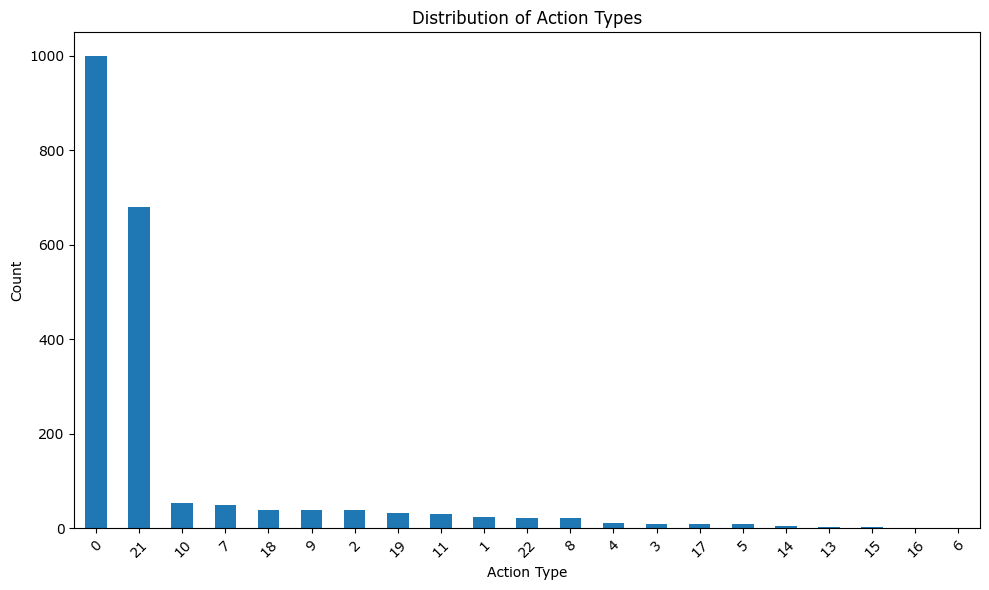

In [12]:


import matplotlib.pyplot as plt

# Query to fetch SPADL data from the database
query = """
SELECT 
    s.id, 
    s.game_id, 
    s.period_id, 
    s.seconds, 
    s.team_id, 
    s.player_id, 
    s.action_type, 
    s.bodypart,
    s.start_x, 
    s.start_y, 
    s.end_x, 
    s.end_y, 
    s.result,
    p.player_name,
    t.team_name
FROM spadl_actions s
JOIN players p ON s.player_id = p.player_id
JOIN teams t ON s.team_id = t.team_id
WHERE s.game_id = '5uts2s7fl98clqz8uymaazehg'
ORDER BY s.id;
"""

spadl_df = pd.read_sql_query(query, conn)
print(f"Loaded {len(spadl_df)} SPADL actions")

# Display the first few rows
display(spadl_df.head())

# Explore action types
action_counts = spadl_df['action_type'].value_counts()
plt.figure(figsize=(10, 6))
action_counts.plot(kind='bar')
plt.title('Distribution of Action Types')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Plotting SPADL actions

To visualize SPADL actions, we can use Python libraries like matplotsoccer.

This library provides functions to create soccer pitch visualizations and plot player actions on the field.


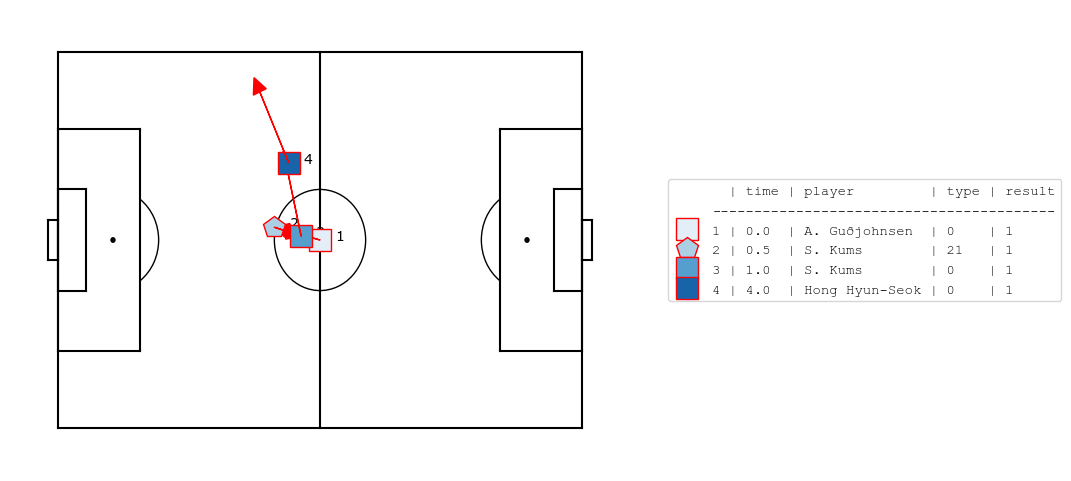

None

In [13]:
import matplotsoccer

# First get 3 random spadl actions that follow each other
spadl_actions = spadl_df.iloc[0:4]

ax = matplotsoccer.actions(
    location=spadl_actions[["start_x", "start_y", "end_x", "end_y"]],
    action_type=spadl_actions.action_type,
    team=spadl_actions.team_name,
    result=spadl_actions.result == "success",
    label= spadl_actions[["seconds", "player_name", "action_type", "result"]]
,
    labeltitle=["time", "player", "type", "result"],
    zoom=False,
    figsize=8,
)
display(ax)


In [ ]:
## Advanced Queries for Soccer Analytics

SQL's power for soccer analytics extends far beyond basic queries. With advanced SQL techniques like window functions, Common Table Expressions (CTEs), and recursive queries, we can extract meaningful insights about game dynamics and team performance.

### Possession Analysis

One of the most valuable applications is possession analysis. This complex query example demonstrates how to:

1. **Identify Possession Changes** - Track when the ball transfers from one team to another
2. **Create Possession Sequences** - Group consecutive actions by the same team
3. **Analyze Possession Effectiveness** - Evaluate how teams use their possession time

CTEs (Common Table Expressions) are especially useful for building these analyses step by step:

- `action_changes` - Uses LAG/LEAD window functions to identify team transitions
- `possession_markers` - Flags the start of new possessions
- `possession_sequences` - Groups actions into possession sequences
- `possession_stats` - Calculates statistics for each possession

### Benefits of Advanced Queries

Advanced SQL queries enable sophisticated analyses:

- Identify which teams maintain longer possessions
- Find patterns in how possessions end (shots, turnovers, etc.)
- Analyze the effectiveness of different possession strategies
- Study how possession relates to game outcomes

### Performance Considerations

When working with large datasets like tracking data, query optimization becomes crucial:
- Use appropriate indexes on commonly filtered columns (game_id, player_id, etc.)
- Consider materializing intermediate results for complex analyses
- Test queries on subsets of data before running on full datasets

These advanced queries form the foundation for higher-level soccer analytics, such as expected goals (xG) models, pressing metrics, and tactical pattern recognition.

In [14]:
complex_query = """
WITH action_changes AS (
    SELECT
        a.*,
        LAG(a.team_id) OVER (ORDER BY a.period_id, a.seconds, a.id) AS prev_team_id,
        LEAD(a.team_id) OVER (ORDER BY a.period_id, a.seconds, a.id) AS next_team_id
    FROM
        spadl_actions a
    WHERE
        a.game_id = '5uts2s7fl98clqz8uymaazehg'
),

possession_markers AS (
    SELECT
        *,
        CASE WHEN prev_team_id IS NULL OR team_id != prev_team_id THEN 1 ELSE 0 END AS is_new_possession
    FROM
        action_changes
),

possession_sequences AS (
    SELECT
        *,
        SUM(is_new_possession) OVER (ORDER BY period_id, seconds, id) AS possession_group
    FROM
        possession_markers
),

possession_stats AS (
    SELECT
        possession_group,
        team_id,
        COUNT(*) AS action_count,
        MAX(id) AS last_action_id
    FROM
        possession_sequences
    GROUP BY
        possession_group, team_id
)

-- Find possession-ending actions where team had 3+ consecutive actions
SELECT
    a.id AS action_id,
    a.game_id,
    a.period_id,
    a.seconds AS time_seconds,
    p.player_name,
    t.team_name AS team_losing_possession,
    nt.team_name AS team_gaining_possession,
    a.action_type AS type_name,
    a.result AS result_name,
    ps.action_count AS consecutive_team_actions,
    a.start_x,
    a.start_y,
    a.end_x,
    a.end_y,
    a.id AS original_event_id
FROM
    possession_sequences a
JOIN
    possession_stats ps ON a.possession_group = ps.possession_group 
                                            AND a.team_id = ps.team_id
                                            AND a.id = ps.last_action_id  
JOIN
    players p ON a.player_id = p.player_id
JOIN
    teams t ON a.team_id = t.team_id
LEFT JOIN
    teams nt ON a.next_team_id = nt.team_id
WHERE
    ps.action_count >= 3  
    AND a.team_id != a.next_team_id  
    AND a.next_team_id IS NOT NULL  
ORDER BY
    a.period_id,
    a.seconds,
    a.id;
"""

# Execute the complex query
possession_df = pd.read_sql_query(complex_query, conn)
print(f"Loaded {len(possession_df)} possession-ending actions")
display(possession_df.head())


Loaded 223 possession-ending actions


,action_id,game_id,period_id,time_seconds,player_name,team_losing_possession,team_gaining_possession,type_name,result_name,consecutive_team_actions,start_x,start_y,end_x,end_y,original_event_id
0,25146,5uts2s7fl98clqz8uymaazehg,1,22.0,A. Brown,Gent,Dender,0,1,13,51.345,60.656,71.715,65.280,25146
1,25160,5uts2s7fl98clqz8uymaazehg,1,48.0,D. Roef,Gent,Dender,0,0,13,7.665,35.292,39.480,63.852,25160
2,25163,5uts2s7fl98clqz8uymaazehg,1,55.0,B. Nsimba,Dender,Gent,0,0,3,40.425,59.296,40.425,68.000,25163
3,25168,5uts2s7fl98clqz8uymaazehg,1,66.0,A. Brown,Gent,Dender,0,0,5,39.795,67.116,42.210,68.000,25168
4,25173,5uts2s7fl98clqz8uymaazehg,1,87.0,F. Ferraro,Dender,Gent,0,1,5,57.855,5.644,40.110,4.624,25173


In [2]:
import pandas as pd
from collections import Counter, defaultdict

complex_query = """
WITH action_changes AS (
    SELECT
        a.*,
        LAG(a.team_id) OVER (ORDER BY a.period_id, a.seconds, a.id) AS prev_team_id,
        LEAD(a.team_id) OVER (ORDER BY a.period_id, a.seconds, a.id) AS next_team_id
        
    FROM
        spadl_actions a
),

possession_markers AS (
    SELECT
        *,
        CASE WHEN prev_team_id IS NULL OR team_id != prev_team_id THEN 1 ELSE 0 END AS is_new_possession
    FROM
        action_changes
),

possession_sequences AS (
    SELECT
        *,
        SUM(is_new_possession) OVER (ORDER BY period_id, seconds, id) AS possession_group
    FROM
        possession_markers
),

possession_stats AS (
    SELECT
        possession_group,
        team_id,
        COUNT(*) AS action_count,
        MAX(id) AS last_action_id
    FROM
        possession_sequences
    GROUP BY
        possession_group, team_id
)
select ps.id, ps.seconds, ps.player_id, ps.team_id, t.team_name, ps.action_type, ps.result, ps.possession_group
from possession_sequences ps
join teams t ON ps.team_id = t.team_id
"""

df = pd.read_sql_query(complex_query, conn)

# Sorteer op 'id' om de volgorde van acties te behouden
f = df.sort_values(by="id").reset_index(drop=True)

# Filter only "Gent" sequences
gent_df = df[df["team_name"] == "Gent"]

# Group by possession_group and collect action_types for Gent
gent_sequences = [group_df["action_type"].tolist() for _, group_df in gent_df.groupby("possession_group")]

# Build transition table for Gent
transition_counts = defaultdict(Counter)
for seq in gent_sequences:
    for i in range(len(seq) - 1):
        current_action = seq[i]
        next_action = seq[i + 1]
        transition_counts[current_action][next_action] += 1

# Calculate transition probabilities
transition_probs = {}
for current_action, next_counts in transition_counts.items():
    total = sum(next_counts.values())
    transition_probs[current_action] = {action: count / total for action, count in next_counts.items()}

# Get all unique action types for Gent
all_action_types = set()
for seq in gent_sequences:
    all_action_types.update(seq)

# Function to predict top 3 most likely next actions
def predict_top_3_next_actions(current_action):
    if current_action not in transition_probs:
        return ["No transitions available"]
    next_action_probs = transition_probs[current_action]
    # Sort by probability (descending) and take top 3
    top_3 = sorted(next_action_probs.items(), key=lambda x: x[1], reverse=True)[:3]
    return [f"{action} (probability: {prob:.2f})" for action, prob in top_3]

# Print predictions for all Gent action types
print("Predictions for Gent - Top 3 Most Likely Next Action Types:")
for action in sorted(all_action_types):
    predictions = predict_top_3_next_actions(action)
    print(f"After action type {action}, the top 3 most likely next action types are:")
    for i, pred in enumerate(predictions, 1):
        print(f"  {i}. {pred}")

C:\Users\riman\AppData\Local\Temp\ipykernel_25784\3874428156.py:47: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(complex_query, conn)


Predictions for Gent - Top 3 Most Likely Next Action Types:
After action type 0, the top 3 most likely next action types are:
  1. 0 (probability: 0.52)
  2. 21 (probability: 0.29)
  3. 19 (probability: 0.03)
After action type 1, the top 3 most likely next action types are:
  1. 0 (probability: 0.60)
  2. 21 (probability: 0.10)
  3. 8 (probability: 0.10)
After action type 10, the top 3 most likely next action types are:
  1. 0 (probability: 0.47)
  2. 21 (probability: 0.33)
  3. 8 (probability: 0.07)
After action type 11, the top 3 most likely next action types are:
  1. 0 (probability: 0.33)
  2. 18 (probability: 0.33)
  3. 11 (probability: 0.22)
After action type 12, the top 3 most likely next action types are:
  1. No transitions available
After action type 13, the top 3 most likely next action types are:
  1. No transitions available
After action type 14, the top 3 most likely next action types are:
  1. 17 (probability: 0.76)
  2. 0 (probability: 0.18)
  3. 21 (probability: 0.06)
